In [9]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
import mlflow

In [10]:
#import Data
Data = pd.read_csv('C:\\Users\\saikumar.godha\\Downloads\\house_data.csv')
Data.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [11]:
#get some information about our Data-Set
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


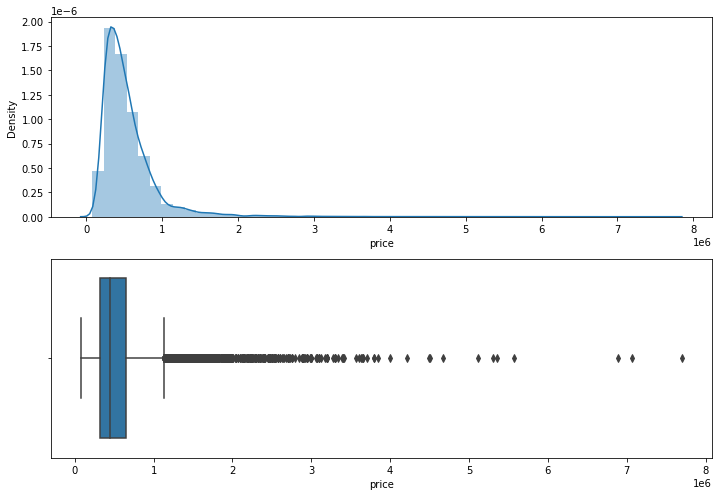

In [12]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()

C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

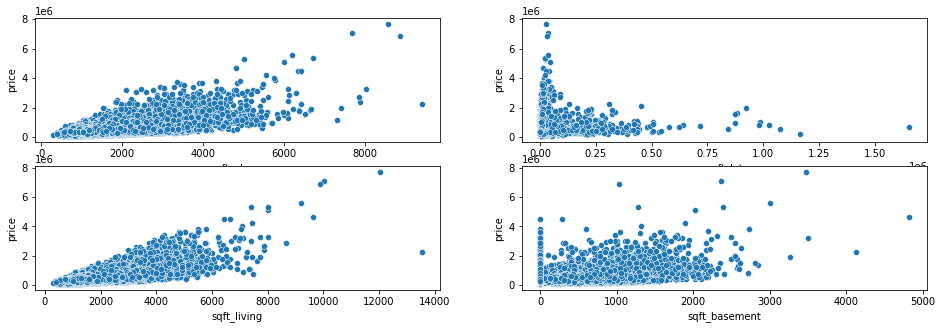

In [13]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


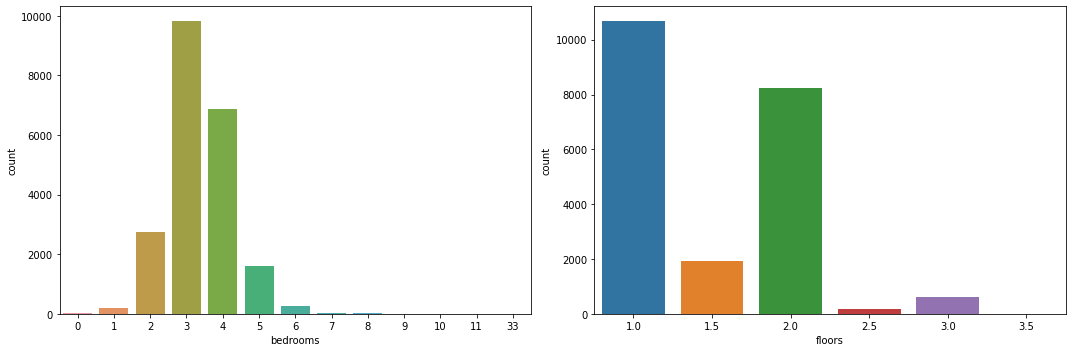

In [14]:
#visualizing bedrooms,floors
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
sns.countplot(Data['bedrooms'])
fig.add_subplot(1,2,2)
sns.countplot(Data['floors'])
plt.tight_layout()

<AxesSubplot:>

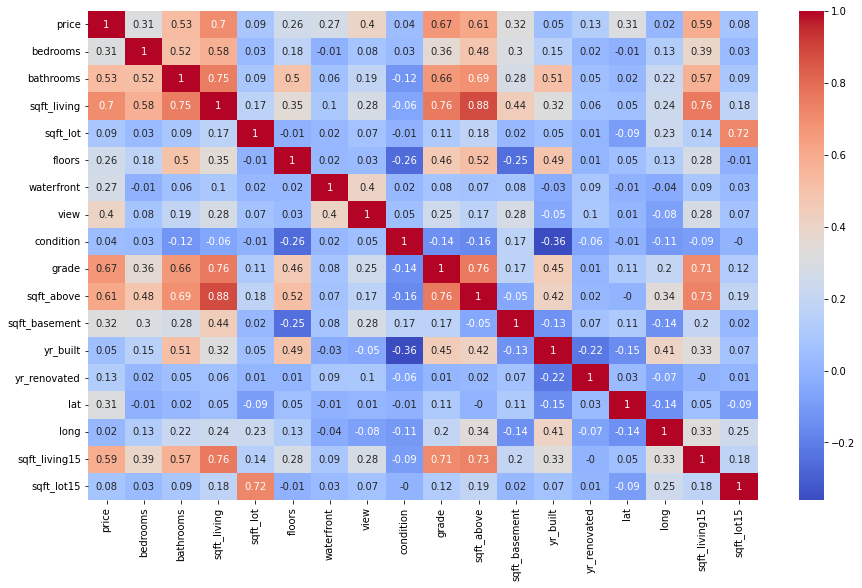

In [15]:
# Plot the correlation heatmap
df = Data.drop(['id','zipcode','date'], axis=1)
plt.figure(figsize=(15, 9))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\saikumar.godha\Miniconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


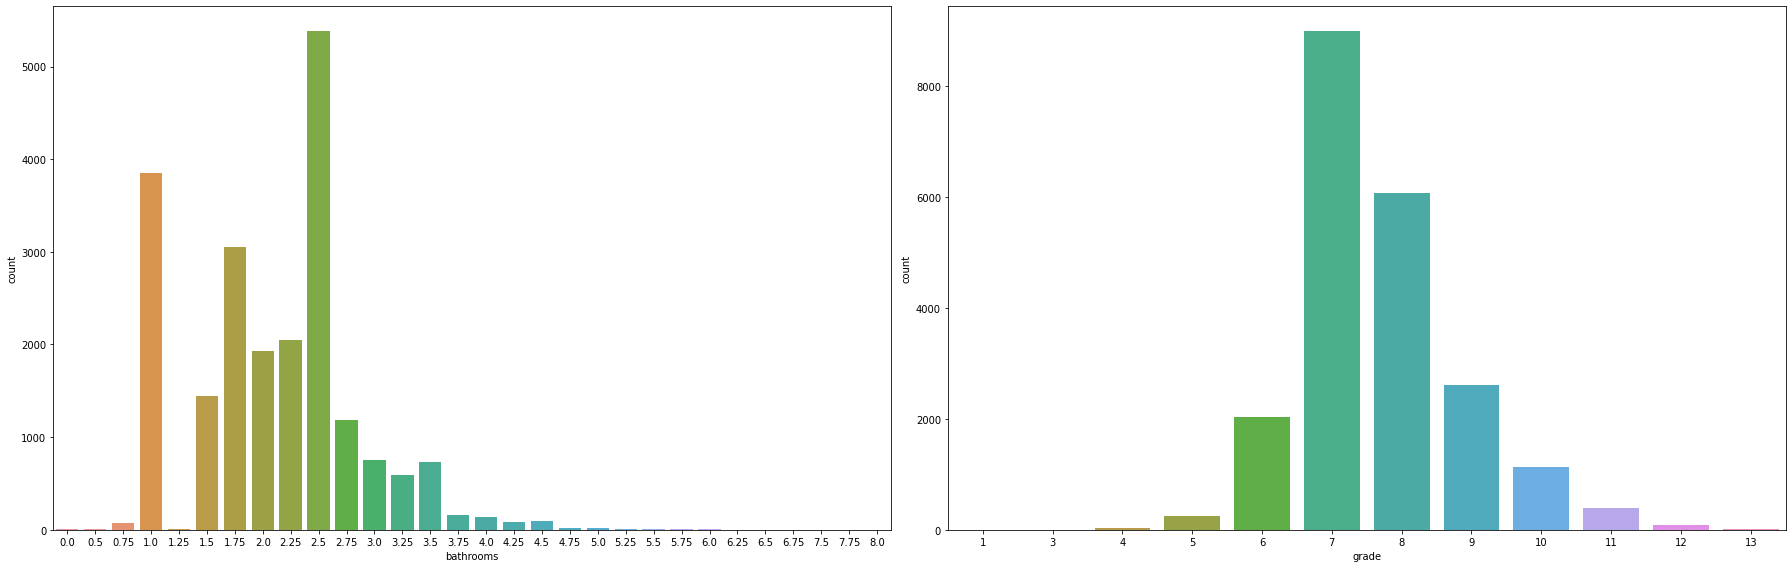

In [16]:
#visualizing bathrooms,grade
fig = plt.figure(figsize=(25,8))
fig.add_subplot(1,2,1)
sns.countplot(Data['bathrooms'])
fig.add_subplot(1,2,2)
sns.countplot(Data['grade'])
plt.tight_layout()

<AxesSubplot:xlabel='year'>

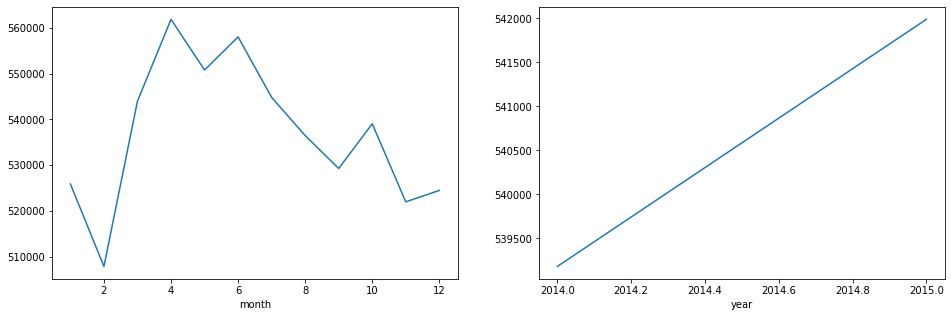

In [17]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)

#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

####Data Preparation 

In [18]:
# check if there are any Null values
Data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month            0
year             0
dtype: int64

In [19]:
# drop some unnecessary columns
Data = Data.drop(['date','month','year'], axis=1)
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [20]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

#splitting Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

###Multilinear regression

In [65]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print("regressor_intercept:",regressor.intercept_)
print("regressor.coefs:\n",regressor.coef_)

regressor_intercept: -37247987.24507883
regressor.coefs:
 [-3.53872824e+04  3.65236849e+04  1.08898188e+02  1.48647237e-01
  5.49592533e+03  5.54594039e+05  4.85191403e+04  3.28178387e+04
  9.79698058e+04  7.12896212e+01  3.76085663e+01 -2.45432329e+03
  2.11546959e+01  5.60359646e+05 -1.20368066e+05  2.82704478e+01
 -3.72285599e-01]


In [66]:
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df.T

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
Coefficient,-35387.282401,36523.684872,108.898188,0.148647,5495.92533,554594.039391,48519.140285,32817.838741,97969.805789,71.289621,37.608566,-2454.32329,21.154696,560359.646328,-120368.065678,28.270448,-0.372286


####Evaluation

In [67]:
#evaluate the performance of the algorithm (MAE - MSE - RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 126500.87520282826
MSE: 41617408499.55636
RMSE: 204003.4521755854
MAPE: 0.5062096569705785
VarScore: 0.7033154449037843


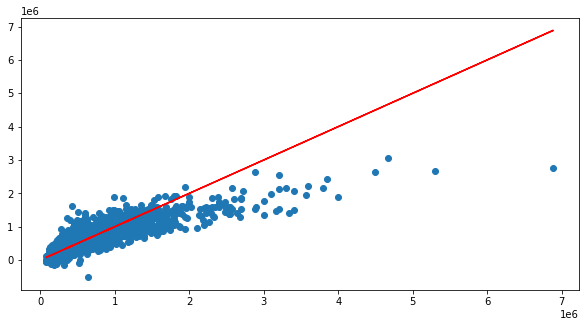

In [70]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

###Neural Network

In [74]:
model = Sequential()
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mape')

In [75]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)
model.summary()

Epoch 1/400
119/119 [==============================] - 5s 9ms/step - loss: 94.6771 - val_loss: 79.5455
Epoch 2/400
119/119 [==============================] - 1s 6ms/step - loss: 60.8682 - val_loss: 50.1935
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 38.2411 - val_loss: 31.3479
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 30.6106 - val_loss: 30.8121
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 30.2119 - val_loss: 30.4841
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 29.9082 - val_loss: 30.2926
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 29.7816 - val_loss: 30.1347
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 29.7186 - val_loss: 30.0236
Epoch 9/400
119/119 [==============================] - 0s 3ms/step - loss: 29.6012 - val_loss: 30.0057
Epoch 10/400
119/119 [==============================] - 0s 3ms/step - los

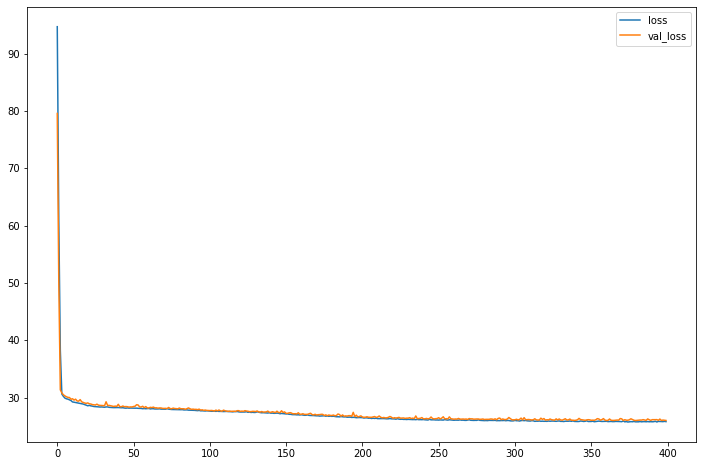

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

####Evaluation

In [77]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 150938.49965419687
MSE: 69873099368.24405
RMSE: 264335.20266556257
MAPE: 0.5099274061850307
VarScore: 0.5580273002066887


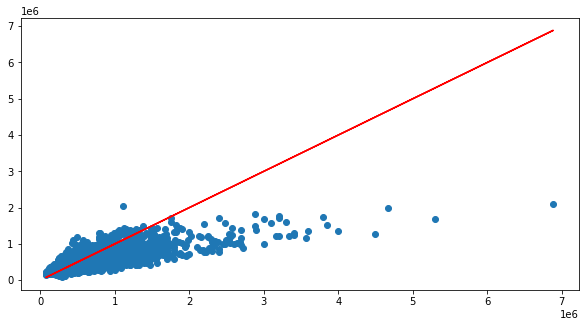

In [78]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

###Random Forest

In [21]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
m.fit(X_train,y_train)
y_pred = m.predict(X_test)

####Evaluation

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE:', np.sqrt(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 70610.57327318528
MSE: 17808890644.598892
RMSE: 133449.955581105
MAPE: 0.36693281689869955
VarScore: 0.873051537712475


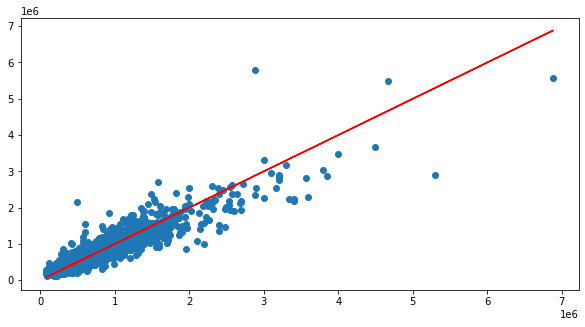

In [36]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

From the above models the evaluation score is given below:

**Multilinear Regression**

MAE: 126500.87520282826

MSE: 41617408499.55636

RMSE: 204003.4521755854

MAPE: 0.5062096569705785

VarScore: 0.7033154449037843

**Neural Network**

MAE: 150938.49965419687

MSE: 69873099368.24405

RMSE: 264335.20266556257

MAPE: 0.5099274061850307

VarScore: 0.5580273002066887

**RandomForest**

MAE: 70610.57327318528

MSE: 17808890644.598892

RMSE: 133449.955581105

MAPE: 0.36693281689869955

VarScore: 0.873051537712475

So we can say that from three model random forest is having good score with ***87%*** compared to both neural network and Multilinear regression.
